# Buisness Understanding
**Stakeholder:** 
* Medical Device Company

**Problem:** 
* The major issue is being unable to produce effective monitoring and treatment technologies for myocardial infarction (MI) survivors. Being able to predict myocardial complications is essential for advancing technologies in this background. MI can occur without complications or with complications that do not worsen the long-term prognosis. However about half of the patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Predicting complications of myocardial infarction is importnat in order to carry out the necessary preventive measures in upcoming developing medical devices that will keep those complication in mind.


# Data Understanding

**Source:**
* [University of California Irvine (UCI) Machine Learning Repositories](https://archive.ics.uci.edu/) 

**Dataset:**
* [Myocardial Infarction Complications](https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications)
    * 1700 rows, 124 columns 
    * 8 potential Target columns, 116 Feature columns
    * All the column names and defintions can be found in the [Column Descriptions](../data/column_descriptions.md) file

**Targets (Myocardial Infarction Complications):**
* FIBR_PREDS (Atrial Fibrillation) 
    * Life-threatening, irregular heartbeat caused by fast and irregular contractions in the upper chambers of the heart. Prevents the heart from pumping blood to the lower chamber of the heart
* PREDS_TAH (Supraventricular Tachycardia)
    * Irregular, fast, or erratic heartbeat that affects the heart's upper chambers. Its not usually serious and does not cause sudden death, heart damage, or heart attacks. In extreme cases that can result but its very unlikely.
* JELUD_TAH (Ventricular Tachycardia)
    * Irregular, fast, or erratic heartbeat that affects the heart's lower chambers. Can become life-threatening if the episode lasts longer than a few seconds also known as a sustained Ventricular Tachycardia. 
* FIBR_JELUD (Ventricular Fibrillation)
    * Life-threatening, irregular heartbeat that affects the heart's ventricles. The lower heart chambers contract rapidly and in an uncoordinated manner. As a result, prevents the heart from pumping blood to the rest of the body.
* A_V_BLOK (Third-degree AV block)
    * Medical condition that occurs when there is a complete loss of communcation between the heart's atria and ventricles. In other words, electrical signals cannot pass from the atria to the ventricles.   
* OTEK_LANC (Pulmonary edema)
    * Life-threatening condition caused by fluid build up in the lungs. This fluid collects in the air sacs in the lungs, making it difficult to breathe.
* RAZRIV (Myocardial rupture)
    * Tear in the heart that occurs after a heart attack. Is life-threatening however is a rare complication of a heart attack.
* DRESSLER (Dressler Syndrome)
    * Inflammation of the sac (pericardium) surrounding the heart. Immune system response due to damage to heart tissue or the sac itself.

**Data Types:**

For this dataset almost all columns have already been numerically encoded for nominal and ordinal columns. There are columns that are numeric that represent realtime values that were taken. These need to be scaled so they don't dramatically impact the modeling results.

Kept Continous Data: 
* ALT_BLOOD (Serum AIAT content)
* AST_BLOOD (Serum AsAT Content)
* L_BLOOD (White Blood Cell Count)
* AGE (Age of patient)

# Model Preparation

Lets split data into a train-test split. 

In [180]:
import pandas as pd
df = pd.read_csv("../data/data_cleaned.csv")


In [181]:
df.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,2,55,1,1,0.0,0.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,6,64,1,0,1.0,2.0,1,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,7,70,1,1,1.0,2.0,1,2,0,7.0,...,0,0,0,0,0,0,1,0,0,0
3,10,77,0,2,0.0,0.0,0,3,0,6.0,...,0,0,0,0,0,0,1,0,0,0
4,11,71,1,0,0.0,0.0,0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
# Import libraries
from sklearn.model_selection import train_test_split

# Define X, y 
X = df.iloc[:, 1:-12] # Features
y = df.iloc[:, -12:-1] # Targets


In [187]:
for col in y.columns:
    print(col)

FIBR_PREDS
PREDS_TAH
JELUD_TAH
FIBR_JELUD
A_V_BLOK
OTEK_LANC
RAZRIV
DRESSLER
ZSN
REC_IM
P_IM_STEN


In [188]:
# Perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

Lets standardize our contnous columns in our training data

In [189]:
# Define our numeric columns that need to be normalized
numeric_features = [
    "ALT_BLOOD",
    "AST_BLOOD",
    "L_BLOOD",
    "AGE"
]

X_train_numeric = X_train[numeric_features].copy()
X_test_numeric = X_test[numeric_features].copy()

In [190]:
from sklearn.preprocessing import StandardScaler

# Instantiate scaler 
scaler = StandardScaler()

# Fit Scaler to continous training data
scaler.fit(X_train_numeric)

# Concatenate training data and testing data respectively
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric), 
    index=X_train_numeric.index,
    columns=X_train_numeric.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric), 
    index=X_test_numeric.index,
    columns=X_test_numeric.columns
)

In [191]:
# Concatenate the scaled data with the original training data and drop the columns that are not scaled

# Drop old columns
X_train.drop(columns=numeric_features, inplace=True)
X_test.drop(columns=numeric_features, inplace=True)

# Concatenate the scaled data with the original training data 
X_train_full = pd.concat([X_train, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test, X_test_scaled], axis=1)

c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Fitting Baseline Models

Create baseline moedels with no modifications to there performances. The well known fact about this dataset is that there are class imbalances so the baseline moedels should perform poorly.

In [192]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, log_loss

In [193]:
# Create Pipeline 
# Define the pipelines for each algorithm Baseline
logreg_pipeline = Pipeline([
    ('classifier', MultiOutputClassifier(LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')))
])

rf_pipeline = Pipeline([
    ('classifier', MultiOutputClassifier(RandomForestClassifier()))
])

knn_pipeline = Pipeline([
    ('classifier', MultiOutputClassifier(KNeighborsClassifier()))
])

# Fit and evaluate the each baseline pipeline
pipelines = [logreg_pipeline, rf_pipeline, knn_pipeline]

# Fit and evaluate each pipeline
for i, pipeline in enumerate([logreg_pipeline, rf_pipeline, knn_pipeline]):
    print(f"Training {pipelines[i]}...")
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_full, y_train)

    print(f"Evaluating {pipelines[i]}...")
    
    # Make predictions on the test data
    predictions = pipeline.predict(X_test_full)

    # Evaluate the pipeline's performance
    loss = log_loss(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=y.columns)

    print(f"Log Loss:{loss}")
    print("\n" + "=" * 40 + "\n")
    print(f"{pipelines[i]} Classification Report:\n", report)
    print("\n" + "=" * 40 + "\n")

Training Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1000000000000.0,
                                                                    fit_intercept=False,
                                                                    solver='liblinear')))])...
Evaluating Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1000000000000.0,
                                                                    fit_intercept=False,
                                                                    solver='liblinear')))])...
Log Loss:8.827703717533455


Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1000000000000.0,
                                                                    fit_intercept=False,
                                                                    solver='liblinear')))]) Classification Report:
               precision 

c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])...
Log Loss:2.9877128636728596


Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))]) Classification Report:
               precision    recall  f1-score   support

  FIBR_PREDS       0.00      0.00      0.00        32
   PREDS_TAH       0.00      0.00      0.00         6
   JELUD_TAH       0.00      0.00      0.00         8
  FIBR_JELUD       0.00      0.00      0.00         8
    A_V_BLOK       0.00      0.00      0.00         4
   OTEK_LANC       0.00      0.00      0.00        31
      RAZRIV       0.00      0.00      0.00         6
    DRESSLER       0.00      0.00      0.00        14
         ZSN       0.68      0.16      0.26        93
      REC_IM       0.00      0.00      0.00        25
   P_IM_STEN       0.00      0.00      0.00        29

   micro avg       0.68      0.06      0.11       256
   macro a

c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Log Loss:3.7796129918452785


Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=KNeighborsClassifier()))]) Classification Report:
               precision    recall  f1-score   support

  FIBR_PREDS       0.00      0.00      0.00        32
   PREDS_TAH       0.00      0.00      0.00         6
   JELUD_TAH       0.00      0.00      0.00         8
  FIBR_JELUD       0.00      0.00      0.00         8
    A_V_BLOK       0.00      0.00      0.00         4
   OTEK_LANC       0.00      0.00      0.00        31
      RAZRIV       0.00      0.00      0.00         6
    DRESSLER       0.00      0.00      0.00        14
         ZSN       0.62      0.11      0.18        93
      REC_IM       0.00      0.00      0.00        25
   P_IM_STEN       0.00      0.00      0.00        29

   micro avg       0.40      0.04      0.07       256
   macro avg       0.06      0.01      0.02       256
weighted avg       0.23      0.04      0.07       256
 samples avg       0.03    

c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As expected we did poorly. In every model we have very low recall (Sensitivity). This suggests our models can't predict actual positive cases. The log loss for all models are very high. 

The next step is to fix the class imbalance in our data because this is significantly influencing prediction capabilities. 

# Class Imbalance

We cant oversample because some feature are just so rare that it can be 1 or 2. Undersampling is a possibility however it runs the risk of underfitting. 

We can do a custom resample strategy where we oversample then undersample. We would need to sort our targets since some are bianry and others arent.

In [194]:
df.shape

(1203, 104)

AUC for 0.33: 0.6114892542842184
-------------------------------------------------------------------------------------
AUC for 0.5: 0.6076083391634507
-------------------------------------------------------------------------------------
AUC for 0.7: 0.6047756461395889
-------------------------------------------------------------------------------------
AUC for even: 0.6034557318282284
-------------------------------------------------------------------------------------


<Figure size 720x576 with 0 Axes>

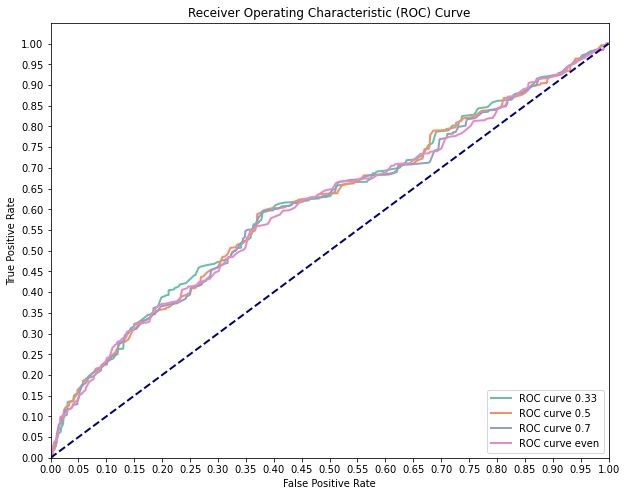

In [203]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Identify which target columns are binary and which are multi-class
# let's compare a few different ratios of minority class to majority class
ratios = [0.33, 0.5, 0.7, 1]
names = ['0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

binary_targets = [
    "FIBR_PREDS",
    "PREDS_TAH",
    "JELUD_TAH",
    "FIBR_JELUD",
    "A_V_BLOK", 
    "OTEK_LANC",
    "RAZRIV",
    "DRESSLER",
    "ZSN",
    "REC_IM",
    "P_IM_STEN"
]

# Initialize lists to store ROC curve data
all_fpr = []
all_tpr = []
for n, ratio in enumerate(ratios):
    # Initialize empty arrays to store individual ROC curve data
    fpr_list = []
    tpr_list = []
    
    # Loop through each binary target column
    for target_col in binary_targets:
        smote = SMOTE(sampling_strategy=ratio, random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train[target_col]) 
        logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear', random_state=42)
        model_log = logreg.fit(X_train_resampled, y_train_resampled)
    
        # Predict
        y_score = logreg.decision_function(X_test_full)

        fpr, tpr, thresholds = roc_curve(y_test[target_col], y_score)
        
        # Append ROC curve data for this binary target column
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    # Compute micro-average ROC curve and AUC
    micro_fpr = np.unique(np.concatenate([fpr for fpr in fpr_list]))
    micro_tpr = np.zeros_like(micro_fpr)
    
    for i in range(len(binary_targets)):
        micro_tpr += np.interp(micro_fpr, fpr_list[i], tpr_list[i])
    
    micro_tpr /= len(binary_targets)
    
    # Store ROC curve data
    all_fpr.append(micro_fpr)
    all_tpr.append(micro_tpr)
    
    # Compute AUC
    roc_auc = auc(micro_fpr, micro_tpr)
    
    print('AUC for {}: {}'.format(names[n], roc_auc))
    print('-------------------------------------------------------------------------------------')

# Plot ROC curves for each ratio
plt.figure(figsize=(10, 8))
lw = 2

for n in range(len(ratios)):
    plt.plot(all_fpr[n], all_tpr[n], color=colors[n], lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [148]:
# Calculate the class distribution for each resampled target column
# for target_col in binary_targets:
#     target_col_name = f"{target_col}"
#     resampled_class_distribution = resampled_df[target_col_name].value_counts()
#     original_class_distribution = df[target_col_name].value_counts()
    
#     print(f"Class Distribution Befotr SMOTE for {target_col}:")
#     print(original_class_distribution)
#     print("__________________________________________________")
#     print(f"Class Distribution After SMOTE for {target_col}:")
#     print(resampled_class_distribution)


Class Distribution Befotr SMOTE for FIBR_PREDS:
0    1085
1     118
Name: FIBR_PREDS, dtype: int64
__________________________________________________
Class Distribution After SMOTE for FIBR_PREDS:
0    816
1    244
Name: FIBR_PREDS, dtype: int64
Class Distribution Befotr SMOTE for PREDS_TAH:
0    1186
1      17
Name: PREDS_TAH, dtype: int64
__________________________________________________
Class Distribution After SMOTE for PREDS_TAH:
0    891
1    169
Name: PREDS_TAH, dtype: int64
Class Distribution Befotr SMOTE for JELUD_TAH:
0    1170
1      33
Name: JELUD_TAH, dtype: int64
__________________________________________________
Class Distribution After SMOTE for JELUD_TAH:
0    877
1    183
Name: JELUD_TAH, dtype: int64
Class Distribution Befotr SMOTE for FIBR_JELUD:
0    1151
1      52
Name: FIBR_JELUD, dtype: int64
__________________________________________________
Class Distribution After SMOTE for FIBR_JELUD:
0    858
1    202
Name: FIBR_JELUD, dtype: int64
Class Distribution Befot

Now lets split the resampled data into training and testing sets

In [149]:
# X_re = resampled_df.iloc[:, 1:-12] # Features
# y_re = resampled_df.iloc[:, -12:-1] #Targets

# X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_re, test_size=.30)

In [150]:
# from sklearn.preprocessing import StandardScaler

# # Instantiate scaler 
# scaler = StandardScaler()

# # Fit Scaler to continous training data
# scaler.fit(X_train_numeric)

# # Concatenate training data and testing data respectively
# X_train_scaled_re = pd.DataFrame(
#     scaler.transform(X_train_numeric), 
#     index=X_train_numeric.index,
#     columns=X_train_numeric.columns
# )

# X_test_scaled_re = pd.DataFrame(
#     scaler.transform(X_test_numeric), 
#     index=X_test_numeric.index,
#     columns=X_test_numeric.columns
# )

# # Concatenate the scaled data with the original training data and drop the columns that are not scaled

# # Drop old columns
# X_train_re.drop(columns=numeric_features, inplace=True)
# X_test_re.drop(columns=numeric_features, inplace=True)

# # Concatenate the scaled data with the original training data 
# X_train_full_re = pd.concat([X_train_re, X_train_scaled_re], axis=1)
# X_test_full_re = pd.concat([X_test_re, X_test_scaled_re], axis=1)

c:\Users\delga\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [151]:
# # Create Pipeline 
# # Define the pipelines for each algorithm Baseline with resampled data
# logreg_pipeline = Pipeline([
#     ('classifier', MultiOutputClassifier(LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')))
# ])

# rf_pipeline = Pipeline([
#     ('classifier', MultiOutputClassifier(RandomForestClassifier()))
# ])

# knn_pipeline = Pipeline([
#     ('classifier', MultiOutputClassifier(KNeighborsClassifier()))
# ])

# # Fit and evaluate the each baseline pipeline
# pipelines = [logreg_pipeline, rf_pipeline, knn_pipeline]

# # Fit and evaluate each pipeline
# for i, pipeline in enumerate([logreg_pipeline, rf_pipeline, knn_pipeline]):
#     print(f"Training {pipelines[i]}...")
    
#     # Fit the pipeline on the training data
#     pipeline.fit(X_train_full_re, y_train_re)

#     print(f"Evaluating {pipelines[i]}...")
    
#     # Make predictions on the test data
#     predictions = pipeline.predict(X_test_full_re)

#     # Evaluate the pipeline's performance
#     loss = log_loss(y_test_re, predictions)
#     report = classification_report(y_test, predictions, target_names=y.columns)

#     print(f"Log Loss:{loss}")
#     print("\n" + "=" * 40 + "\n")
#     print(f"{pipelines[i]} Classification Report:\n", report)
#     print("\n" + "=" * 40 + "\n")

Training Pipeline(steps=[('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1000000000000.0,
                                                                    fit_intercept=False,
                                                                    solver='liblinear')))])...


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').